In [2]:
import pandas as pd
import matplotlib.pyplot as plot
import numpy as np

from sklearn import preprocessing


# Import the dataset
dataset2 = pd.read_csv('./dataset/trainingset.csv', header=None)
dataset2.columns = ['id', 'age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'campaign', 'pdays', 'previous', 'poutcome', 'target']



In [3]:
dataset2.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,target
0,TR42,59,JobCat11,married,secondary,no,2343,yes,no,unknown,5,may,1,-1,0,unknown,yes
1,TR44,41,JobCat9,married,secondary,no,1270,yes,no,unknown,5,may,1,-1,0,unknown,yes
2,TR62,55,JobCat7,married,secondary,no,2476,yes,no,unknown,5,may,1,-1,0,unknown,yes
3,TR205,56,JobCat6,married,tertiary,no,830,yes,yes,unknown,6,may,1,-1,0,unknown,yes
4,TR206,60,JobCat2,divorced,secondary,no,545,yes,no,unknown,6,may,1,-1,0,unknown,yes


In [4]:
from scipy.stats import zscore

dataset2[['balance']].mean()
dataset2[['balance']].mean()

dataset2['balance_outliers'] = dataset2['balance']
dataset2['balance_outliers']= zscore(dataset2['balance_outliers'])

condition1 = (dataset2['balance_outliers']>3) | (dataset2['balance_outliers']<-3 )
dataset3 = dataset2.drop(dataset2[condition1].index, axis = 0, inplace = False)

In [5]:
dataset4 = dataset3.drop('balance_outliers', axis=1)

In [6]:
df = dataset4.drop('contact', axis=1)

In [7]:
condition3 = (df['education'] == 'unknown')

df[condition3]

,id,age,job,marital,education,default,balance,housing,loan,day,month,campaign,pdays,previous,poutcome,target
34,TR1360,52,JobCat6,married,unknown,no,2240,yes,no,13,may,1,-1,0,unknown,yes
45,TR1610,40,JobCat9,single,unknown,no,3652,yes,no,14,may,2,-1,0,unknown,yes
51,TR1811,44,JobCat3,married,unknown,no,146,yes,no,15,may,1,-1,0,unknown,yes
85,TR2596,33,JobCat3,married,unknown,no,4822,yes,no,20,may,2,-1,0,unknown,yes
123,TR3752,21,JobCat5,single,unknown,no,854,yes,no,28,may,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24218,TR24164,35,JobCat3,married,unknown,no,444,no,no,1,oct,1,94,9,other,no
24239,TR24195,33,JobCat3,divorced,unknown,no,172,no,no,11,oct,1,381,2,other,no
24251,TR24218,42,JobCat11,married,unknown,no,756,no,no,14,oct,4,160,3,failure,no
24288,TR24285,77,unknown,married,unknown,no,397,no,no,8,nov,1,185,3,success,no


In [8]:
condition4 = (df['job'] == 'unknown')
df = df.drop(df[condition4].index, axis = 0, inplace = False)

In [9]:

# Dropping the id column because is unnecssary for building a classifier
df = df.drop(columns=['id'])
dataset2 = dataset2.drop(columns=['id'])
dataset2 = dataset2.drop(columns=['contact'])
dataset2 = dataset2.drop(columns=['balance_outliers'])

# Take all the object dtypes (descriptive features) from the dataframe
cat_df = df.select_dtypes(include=['object']).copy()
# Drop out the target feature
cat_df = cat_df.drop(columns=['target'])
# Use LabelEncoder to encode categorical columns to integers
le = preprocessing.LabelEncoder()
cat_df_trf = cat_df.astype(str).apply(le.fit_transform)


cat_df1 = dataset2.select_dtypes(include=['object']).copy()
# Drop out the target feature
cat_df1 = cat_df1.drop(columns=['target'])
# Use LabelEncoder to encode categorical columns to integers
cat_df_trf1 = cat_df1.astype(str).apply(le.fit_transform)
df.update(cat_df_trf)
dataset2.update(cat_df_trf1)
dataset2



,age,job,marital,education,default,balance,housing,loan,day,month,campaign,pdays,previous,poutcome,target
0,59,2,1,1,0,2343,1,0,5,8,1,-1,0,3,yes
1,41,10,1,1,0,1270,1,0,5,8,1,-1,0,3,yes
2,55,8,1,1,0,2476,1,0,5,8,1,-1,0,3,yes
3,56,7,1,2,0,830,1,1,6,8,1,-1,0,3,yes
4,60,3,0,1,0,545,1,0,6,8,1,-1,0,3,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24295,60,8,1,1,0,4428,0,0,9,9,1,96,6,0,no
24296,29,7,1,2,0,720,1,0,9,9,3,-1,0,3,no
24297,71,3,1,1,0,2064,0,0,9,9,2,92,3,0,no
24298,33,8,1,2,0,4655,0,0,9,9,2,-1,0,3,no


In [12]:
head = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'day', 'month', 'campaign', 'pdays', 'previous', 'poutcome']
X = df[head]
y = df['target']

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
df

,age,job,marital,education,default,balance,housing,loan,day,month,campaign,pdays,previous,poutcome,target
0,59,2,1,1,0,2343,1,0,5,8,1,-1,0,3,yes
1,41,10,1,1,0,1270,1,0,5,8,1,-1,0,3,yes
2,55,8,1,1,0,2476,1,0,5,8,1,-1,0,3,yes
3,56,7,1,2,0,830,1,1,6,8,1,-1,0,3,yes
4,60,3,0,1,0,545,1,0,6,8,1,-1,0,3,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24295,60,8,1,1,0,4428,0,0,9,9,1,96,6,0,no
24296,29,7,1,2,0,720,1,0,9,9,3,-1,0,3,no
24297,71,3,1,1,0,2064,0,0,9,9,2,92,3,0,no
24298,33,8,1,2,0,4655,0,0,9,9,2,-1,0,3,no


In [50]:
testData = pd.read_csv('./dataset/queries.csv', header=None)
# Take all the object dtypes (descriptive features) from the dataframe
cat_df = testData.select_dtypes(include=['object']).copy()
# Drop out the target feature

# Use LabelEncoder to encode categorical columns to integers
le = preprocessing.LabelEncoder()
cat_df_trf = cat_df.astype(str).apply(le.fit_transform)
testData.update(cat_df_trf)
testData

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0,58,7,1,2,0,2143,1,0,2,5,8,1,-1,0,3,0
1,1111,30,4,2,0,0,23,1,1,2,5,8,1,-1,0,3,0
2,1923,53,10,1,1,0,-3,0,0,2,5,8,1,-1,0,3,0
3,2034,36,7,2,2,0,424,1,0,2,5,8,1,-1,0,3,0
4,2145,53,10,1,1,0,384,1,0,2,5,8,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2695,1885,36,7,2,2,0,1373,0,0,0,22,10,4,-1,0,3,0
2696,1886,31,2,1,1,0,51,1,1,0,25,10,1,284,3,2,0
2697,1887,23,6,2,1,0,1868,0,0,0,26,10,1,103,2,1,0
2698,1888,28,7,2,2,0,297,0,0,0,8,9,1,-1,0,3,0


Accuracy of Decision Tree classifier on training set: 0.90
Accuracy of Decision Tree classifier on test set: 0.89


[[5122   74]
 [ 595  143]]


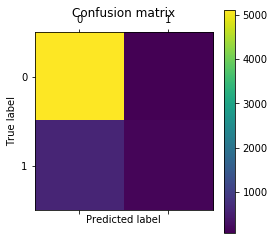



              precision    recall  f1-score   support

          no       0.90      0.99      0.94      5196
         yes       0.66      0.19      0.30       738

    accuracy                           0.89      5934
   macro avg       0.78      0.59      0.62      5934
weighted avg       0.87      0.89      0.86      5934



In [74]:
#决策树算法（decision tree）
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 3)
clf.fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
    .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
    .format(clf.score(X_test, y_test)))
print("\n")
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
pred = clf.predict(X_test)
print(confusion_matrix(y_test, pred))

plt.matshow(confusion_matrix(y_test, pred))
#plt.plot(confusionMatrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print("\n")
print(classification_report(y_test, pred))




Accuracy of K-NN classifier on training set: 0.91
Accuracy of K-NN classifier on test set: 0.88
[[5109   87]
 [ 645   93]]


[[5109   87]
 [ 645   93]]


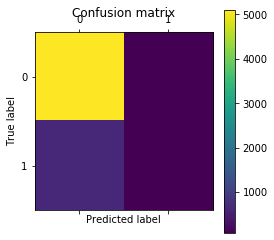



              precision    recall  f1-score   support

          no       0.89      0.98      0.93      5196
         yes       0.52      0.13      0.20       738

    accuracy                           0.88      5934
   macro avg       0.70      0.55      0.57      5934
weighted avg       0.84      0.88      0.84      5934



In [375]:
#Knn算法
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
    .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
    .format(knn.score(X_test, y_test)))

pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print("\n")

print(confusion_matrix(y_test, pred))

plt.matshow(confusion_matrix(y_test, pred))
#plt.plot(confusionMatrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print("\n")
print(classification_report(y_test, pred))

Accuracy of LDA classifier on training set: 0.89
Accuracy of LDA classifier on test set: 0.88
[[5184   12]
 [ 729    9]]


[[5184   12]
 [ 729    9]]


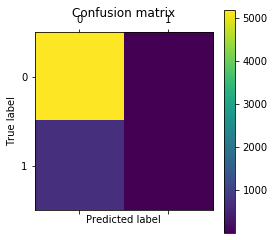



              precision    recall  f1-score   support

          no       0.88      1.00      0.93      5196
         yes       0.43      0.01      0.02       738

    accuracy                           0.88      5934
   macro avg       0.65      0.50      0.48      5934
weighted avg       0.82      0.88      0.82      5934



In [377]:
#线性判别分析（LDA）

from sklearn.linear_model import LogisticRegression
lda = LogisticRegression()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
    .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
    .format(lda.score(X_test, y_test)))

pred = lda.predict(X_test)
print(confusion_matrix(y_test, pred))
print("\n")

print(confusion_matrix(y_test, pred))

plt.matshow(confusion_matrix(y_test, pred))
#plt.plot(confusionMatrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print("\n")
print(classification_report(y_test, pred))

Accuracy of GNB classifier on training set: 0.82
Accuracy of GNB classifier on test set: 0.81
[[4603  593]
 [ 543  195]]


[[4603  593]
 [ 543  195]]


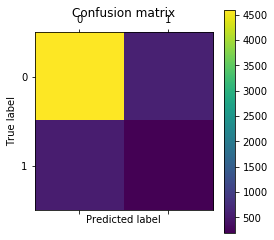



              precision    recall  f1-score   support

          no       0.89      0.89      0.89      5196
         yes       0.25      0.26      0.26       738

    accuracy                           0.81      5934
   macro avg       0.57      0.58      0.57      5934
weighted avg       0.81      0.81      0.81      5934



In [19]:
#朴素贝叶斯算法（Naive Bayes）

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
    .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
    .format(gnb.score(X_test, y_test)))

pred = gnb.predict(X_test)
print(confusion_matrix(y_test, pred))
print("\n")

print(confusion_matrix(y_test, pred))

plt.matshow(confusion_matrix(y_test, pred))
#plt.plot(confusionMatrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print("\n")
print(classification_report(y_test, pred))